In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # for plots
import pandas as pd
from os import mkdir, path
from sklearn import linear_model, model_selection, preprocessing
import math
from scipy import stats

%matplotlib notebook

# Question 1
Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/
portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives
et le nombre d’observations

In [2]:
filename = 'data_dm3.csv'
df = pd.read_csv(filename,header=None) # charge les données
df.head() # affiche résumé un des données
Y = df.iloc[:,-1].values
X = df.iloc[:,0:-1].values
n = len(X)
p = X.shape[1]
print("nombre d'observations = " + str(n))
print("nombre de variables explicatives = " + str(p))

nombre d'observations = 442
nombre de variables explicatives = 210


# Question 2
Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres). Commenter les graphiques obtenus.

True True => X est normalisé
False False => Y n'est pas normalisé

Les variables X ne sont pas corrélées entre elles
Mais elles semblent ne pas être corrélées avec Y non plus, et on espère quand même qu'il en existe quelque une


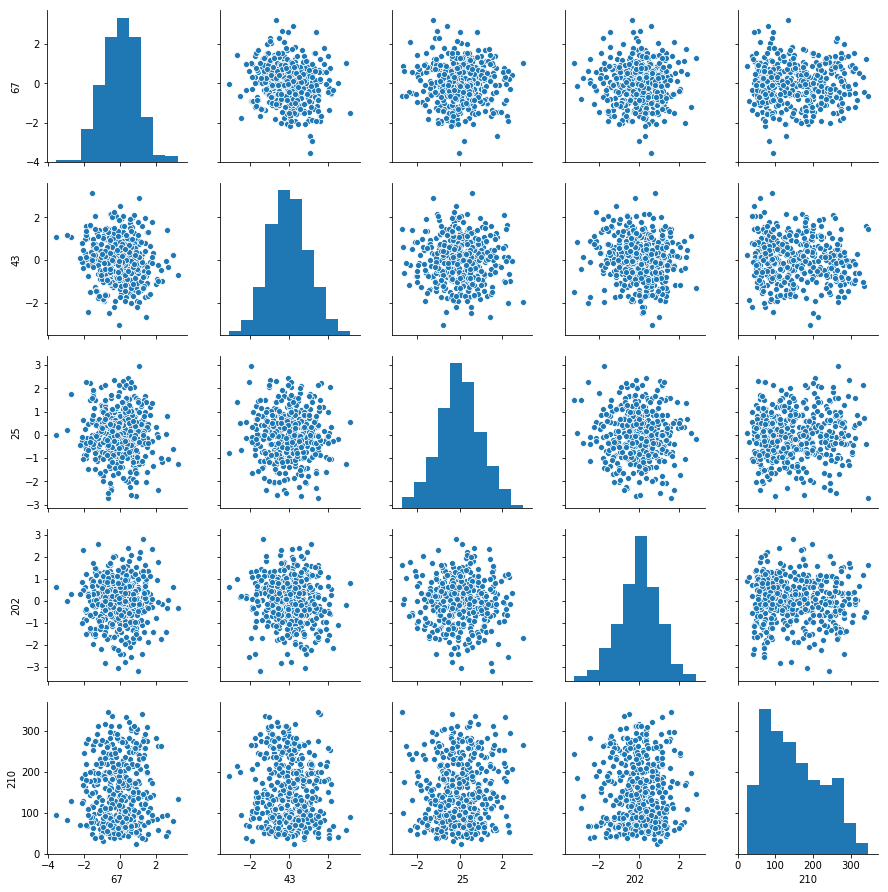

In [3]:
Xm = np.mean(X,axis=0)
Ym = np.mean(Y,axis=0)
varX = np.var(X,axis=0)
varY = np.var(Y,axis=0)

print(np.allclose(Xm,0),np.allclose(varX,1),"=> X est normalisé") 
print(np.allclose(Ym,0),np.allclose(varY,1),"=> Y n'est pas normalisé")

# Scatter Plot
list_random = np.random.choice(210, 4)
sns.pairplot(df.iloc[:,np.append(list_random,210)])
print("\nLes variables X ne sont pas corrélées entre elles")
print("Mais elles semblent ne pas être corrélées avec Y non plus, et on espère quand même qu'il en existe quelques unes")

# Question 3 
Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle Xtrain,
un pour tester le modèle Xtest. On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables Xtrain n’est pas
normalisé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [4]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, Y, test_size=0.2) # créer 2 échantillons 80%-20% aléatoirement choisi
print('Xtrain.shape = ' + str(Xtrain.shape))
print('Xtest.shape = ' + str(Xtest.shape))

Xtrain.shape = (353, 210)
Xtest.shape = (89, 210)


# Question 4
Donner la matrice de covariance calculée sur Xtrain. Tracer le graphe de la décroissance des valeurs
propres de la matrice de covariance (ou de corrélation). Expliquer pourquoi il est légitime de ne
garder que les premières variables de l’ACP. On gardera 60 variables dans la suite

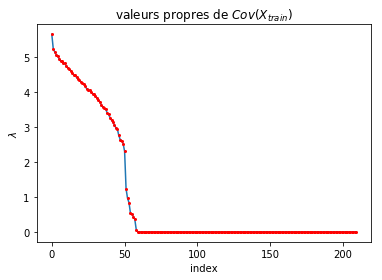

On peut garder les 60 premières variables de l'ACP car les autres ont des valeurs propres nulles, il n'y a pas d'autres directions à considérer


In [5]:
Cov_Xtrain = np.cov(Xtrain.T)
valeurs_propres, vecteurs_propres = np.linalg.eigh(Cov_Xtrain) # déjà trié
valeurs_propres = valeurs_propres[::-1] # ordre decroissant
vecteurs_propres = vecteurs_propres[::-1]
plt.figure(0)
plt.plot(valeurs_propres),plt.plot(valeurs_propres,'ro',markersize=2)
plt.title('valeurs propres de $Cov(X_{train})$'),plt.xlabel('index'),plt.ylabel('$\lambda$')
plt.show()
print("On peut garder les 60 premières variables de l'ACP car les autres ont des valeurs propres nulles, il n'y a pas d'autres directions à considérer")

# Question 5
Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et XtrainV(1:60), où Vp1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

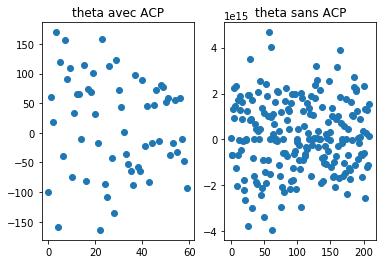

On remarque la différence de variance des coefficients entre avec ACP et sans ACP


In [6]:
V = vecteurs_propres[:,0:60]
OLS_ACP = linear_model.LinearRegression(fit_intercept=True) # parce que Xtrain n'est pas centré, on met intercept=true
OLS_ACP.fit(np.dot(Xtrain,V),Ytrain)
Theta_ACP = OLS_ACP.coef_
plt.figure(1)
plt.subplot(121)
plt.plot(Theta_ACP,'o'),plt.title('theta avec ACP')

OLS = linear_model.LinearRegression(fit_intercept=True) # parce que Xtrain n'est pas centré, on met intercept=true
OLS.fit(Xtrain,Ytrain)
Theta = OLS.coef_
plt.subplot(122)
plt.plot(Theta,'o'),plt.title('theta sans ACP')
plt.show()
print("On remarque la différence de variance des coefficients entre avec ACP et sans ACP")

# Question 6
Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne
de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter.
Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sut le train.

In [7]:
intercept_ACP = OLS_ACP.intercept_
intercept = OLS.intercept_
print("intercept sans ACP:",intercept)
print("intercept avec ACP:",intercept_ACP)

Xtrainc = preprocessing.StandardScaler().fit_transform(Xtrain.dot(V)) # normalise
OLS_PCAc = linear_model.LinearRegression()
OLS_PCAc.fit(Xtrain,Ytrain)
print("intercept avec ACP centré:",OLS_PCAc.intercept_)
print("Y moyen:",np.mean(Ytrain))

intercept sans ACP: 154.41306657223797
intercept avec ACP: 153.3103957498405
intercept avec ACP centré: 154.41306657223797
Y moyen: 153.60056657223797


# Question 7
Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon
test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de
détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

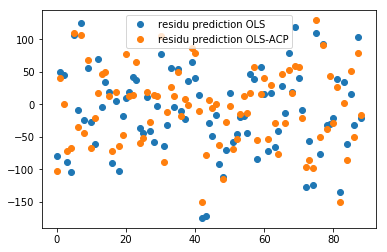

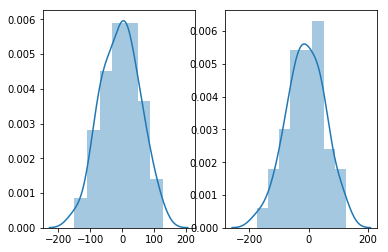

risque de prédiction : 
OLS avec PCA :  0.33466223334748857  - OLS classique :  0.21565640259325292
risque de prédiction: 
OLS avec PCA :  0.33466223334748857  - OLS classique :  0.21565640259325292


In [15]:
res_pred_ACP = Ytest - OLS_ACP.predict(np.dot(Xtest,V))
res_pred = Ytest - OLS.predict(Xtest)
plt.plot(res_pred,'o',label='residu prediction OLS')
plt.plot(res_pred_ACP,'o',label='residu prediction OLS-ACP')
plt.legend()
plt.show()
plt.figure()
plt.subplot(121)
sns.distplot(res_pred_ACP)
plt.subplot(122)
sns.distplot(res_pred)
plt.show()

# coefficient de determination 
score_OLS_ACP = OLS_ACP.score(np.dot(Xtest,V),Ytest)
score_OLS = OLS.score(Xtest,Ytest)
print("risque de prédiction : ")
print("OLS avec PCA : ", score_OLS_ACP," - OLS classique : ", score_OLS)
print("OLS avec PCA est un peu mieux que OLS classique")
# risque de prédiction = coefficient de determination
#r = OLS.predict(Xtest)-Ytest
#r_ACP = r_ACP.dot(r_ACP)

# Question 8
Coder la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode.
C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables.
Afficher l’ordre de séléction des variables

In [9]:
#X_fwd = Xtrain[:,0].reshape(-1,1)
#for k in np.arange(0,210):
#    OLS = linear_model.LinearRegression().fit(X_fwd, Ytrain)
#    sse = (((Ytrain - OLS.predict(X_fwd))**2).sum()) / (X_fwd.shape[0] - X_fwd.shape[1])
#    coefficients_standard_errors = np.sqrt(sse*np.diag(np.linalg.inv(X_fwd.T.dot(X_fwd))))
#   T_test = OLS.coef_/sse
#    res = OLS.predict(Xtest[:,k].reshape(-1,1))-Ytest
#    X_fwd = res.reshape(-1,1)

# Question 11
Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [10]:
CV = model_selection.KFold(n_splits=4, random_state=123456, shuffle=True)
for k,[_,test_index] in enumerate(CV.split(Xtrain)):
    print("K=",k,"- echantillon de test :", test_index,"\n")

K= 0 - echantillon de test : [  1   2   6   9  10  12  13  19  22  24  31  35  36  40  41  50  52  53
  57  60  66  69  70  76  78  82  96  98 110 112 113 114 116 117 123 124
 132 134 142 144 152 161 162 169 172 181 183 189 190 192 203 206 213 216
 217 222 223 225 229 230 231 237 240 247 250 256 259 263 274 275 283 291
 292 296 297 299 300 302 304 311 315 316 327 337 339 340 341 349 352] 

K= 1 - echantillon de test : [  7   8  15  17  25  26  27  28  38  54  59  63  72  74  75  81  85  87
  89  90  91  92 100 102 103 107 108 111 115 121 133 135 137 148 149 154
 155 160 165 173 180 184 188 191 196 197 199 204 205 219 221 226 227 228
 232 236 243 245 246 249 251 253 254 255 257 258 264 265 267 269 270 271
 273 276 277 279 282 284 285 290 293 310 320 321 334 336 338 351] 

K= 2 - echantillon de test : [  3  11  14  16  21  23  29  37  42  45  46  47  48  55  58  61  64  73
  77  79  80  88  93  97 104 105 106 109 122 126 127 128 129 130 131 139
 147 150 151 153 157 158 163 166 168 174 17

# Question 12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune
des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour
estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du
risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir
l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur
du risque sur le test.

lambda optimal =  74


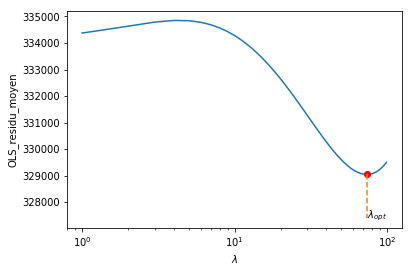

In [11]:
OLS_res_mean = []
Lambda = np.arange(1,100)
for L in Lambda:
    OLS_Ridge = linear_model.Ridge(alpha=L)
    OLS_score = []
    OLS_res = []
    for [train_index,test_index] in CV.split(Xtrain):
        Xtrain_K, Ytrain_K, Xtest_K, Ytest_K = Xtrain[train_index], Ytrain[train_index], Xtrain[test_index], Ytrain[test_index]
        OLS_Ridge.fit(Xtrain_K,Ytrain_K)
        r = OLS_Ridge.predict(Xtest_K)-Ytest_K
        OLS_res.append(r.dot(r))
    OLS_res_mean.append(np.mean(OLS_res))

L_opt = np.argmin(OLS_res_mean) + 1
print('lambda optimal = ', L_opt)

plt.figure()
plt.plot(Lambda, OLS_res_mean)
plt.xlabel('$\lambda$')
plt.ylabel('OLS_residu_moyen')
plt.xscale('log')
plt.plot(L_opt,min(OLS_res_mean),'ro')
plt.plot([L_opt,L_opt],[min(OLS_res_mean),min(OLS_res_mean)-0.005*min(OLS_res_mean)],'--')
plt.text(L_opt,min(OLS_res_mean)-0.005*min(OLS_res_mean),"$\lambda_{opt}$")
plt.show()

# Question 13
A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

lambda_Lasso_opt =  4.605507549535707
R2 =  0.4439804656801274


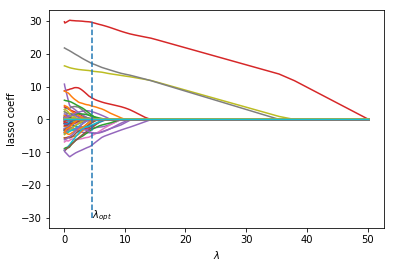

In [12]:
lassoCV = linear_model.LassoCV(cv=4).fit(Xtrain, Ytrain)
lambda_Lasso_opt = lassoCV.alpha_
print("lambda_Lasso_opt = ",lambda_Lasso_opt)

lasso = linear_model.Lasso(alpha=lambda_Lasso_opt).fit(Xtrain, Ytrain)
r2 = lasso.score(Xtest,Ytest)
print('R2 = ',r2)

lambdas_lasso, coefs_lasso, _ = linear_model.lasso_path(Xtrain, Ytrain)
plt.figure()
plt.plot(lambdas_lasso,coefs_lasso.T)
plt.plot([lambda_Lasso_opt,lambda_Lasso_opt],[-30,30],'--')
plt.xlabel("$\lambda$"),plt.ylabel("lasso coeff")
plt.text(lambda_Lasso_opt,-30,"$\lambda_{opt}$")
plt.show()

# Question 14
Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-square LASSO.

In [13]:
index_lasso_selected = np.where(lasso.coef_!=0) # recupere les indices où lasso.coef_!=0
index_lasso_selected = np.array(index_lasso_selected)[0] # cast en 1D array
print("=> ",len(index_lasso_selected)," variables selectionnées (coeff non nul) dont les index sont ",index_lasso_selected)

Xtrain_selected = Xtrain[:,index_lasso_selected]
OLS_lasso_selection = linear_model.LinearRegression().fit(Xtrain_selected,Ytrain)

print("R2 lasso = ",lasso.score(Xtest,Ytest))
print("R2 OLS (avec selection) = ",OLS_lasso_selection.score(Xtest[:,index_lasso_selected],Ytest))

=>  20  variables selectionnées (coeff non nul) dont les index sont  [  5  13  14  28  31  47  49  53  58  85 111 117 123 129 135 159 167 174
 192 208]
R2 lasso =  0.4439804656801274
R2 OLS (avec selection) =  0.3886109840612695


# Question 15
En utilisant les variables sélectionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une
méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée
et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances
moindres par rapport à OLS peuvent se produire. Commenter.

In [14]:
 # on ajoute des colonnes de xi^2 dans notre X pour avoir un modèle non linéaire
XtrainNL = np.concatenate((Xtrain_selected,np.square(Xtrain_selected)), axis=1)
XtestNL = np.concatenate((Xtest[:,index_lasso_selected],np.square(Xtest[:,index_lasso_selected])), axis=1)
lassoCV_NL = linear_model.LassoCV(cv=4).fit(XtrainNL, Ytrain)
lambda_Lasso_opt_NL = lassoCV.alpha_
lassoNL = linear_model.Lasso(alpha=lambda_Lasso_opt_NL).fit(XtrainNL, Ytrain)
r2_lassoNL = lassoNL.score(XtestNL,Ytest)

OLSNL = linear_model.Lasso().fit(XtrainNL, Ytrain)
r2_OLSNL = OLSNL.score(XtestNL,Ytest)

print("r2_OLSL = ",r2)
print('r2_lassoL = ',lasso.score(Xtest,Ytest))
print('r2_lassoNL = ',r2_lassoNL)
print('r2_OLSNL = ',r2_OLSNL)
print("==> R2_NL > R2, le modèle non linéaire semble être plus approprié pour nos données")

r2_OLSL =  0.4439804656801274
r2_lassoL =  0.4439804656801274
r2_lassoNL =  0.4526333591478048
r2_OLSNL =  0.39321567575775007
==> R2_NL > R2, le modèle non linéaire semble être plus approprié pour nos données
